In [31]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn .combine import SMOTETomek
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("Fraud_check.csv")

In [33]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA & Visualization

In [34]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [35]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [36]:
df.shape

(600, 6)

In [37]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [38]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

array([[<AxesSubplot:title={'center':'Taxable.Income'}>]], dtype=object)

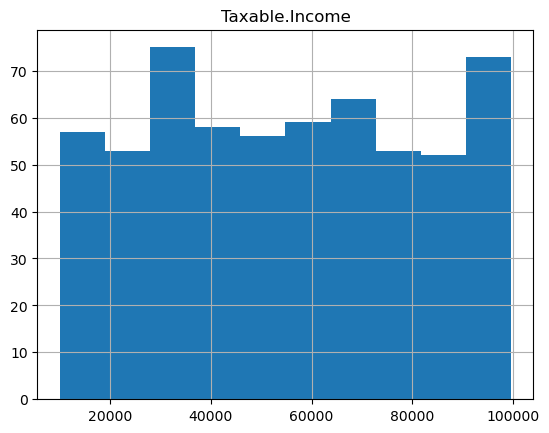

In [39]:
df.hist('Taxable.Income')

<AxesSubplot:>

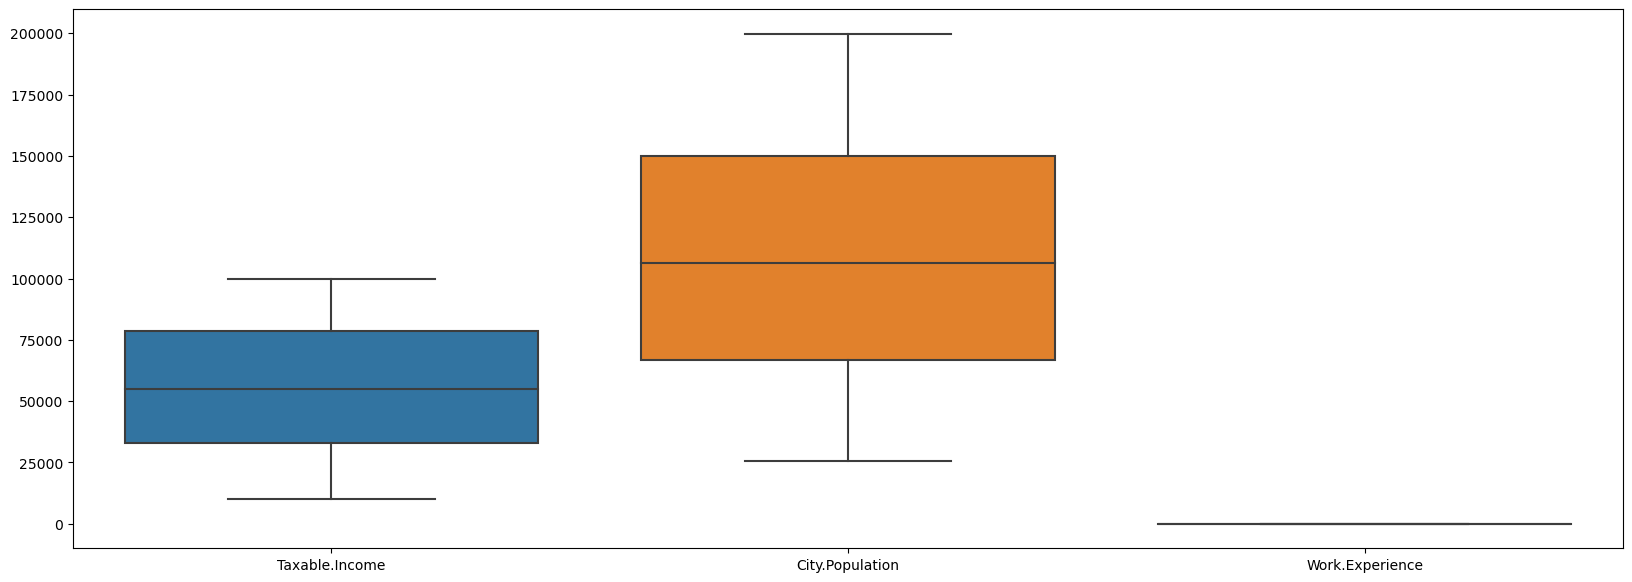

In [40]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

Undergrad


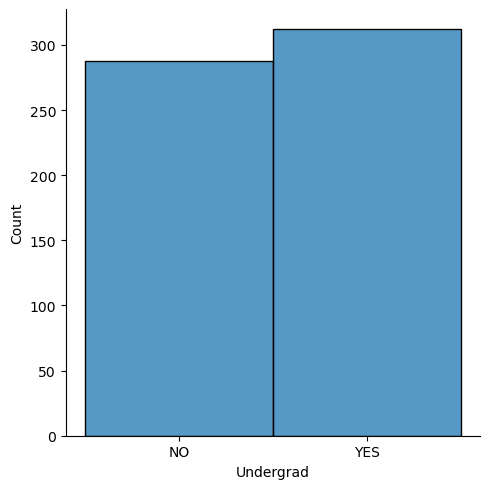

<Figure size 2000x700 with 0 Axes>

Marital.Status


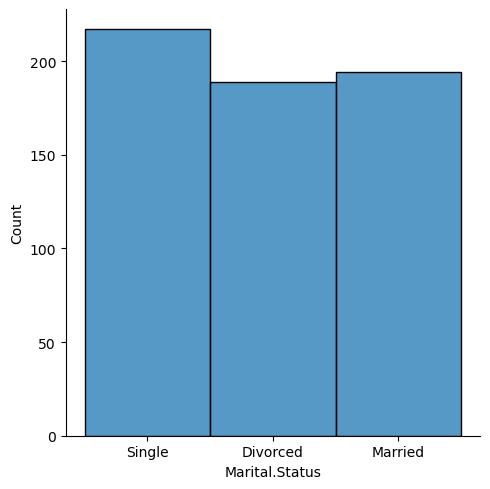

<Figure size 2000x700 with 0 Axes>

Taxable.Income


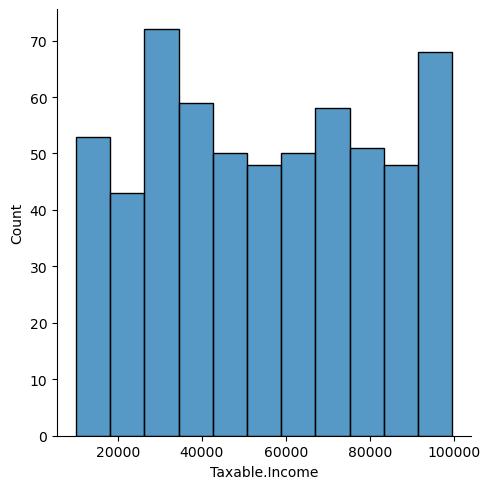

<Figure size 2000x700 with 0 Axes>

City.Population


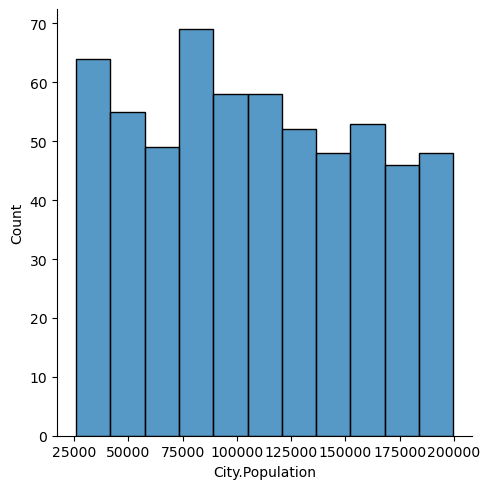

<Figure size 2000x700 with 0 Axes>

Work.Experience


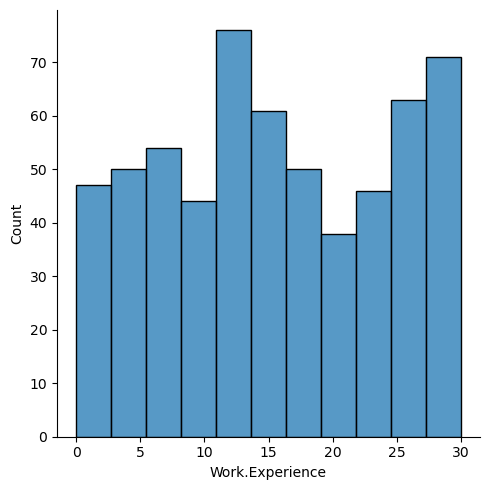

<Figure size 2000x700 with 0 Axes>

Urban


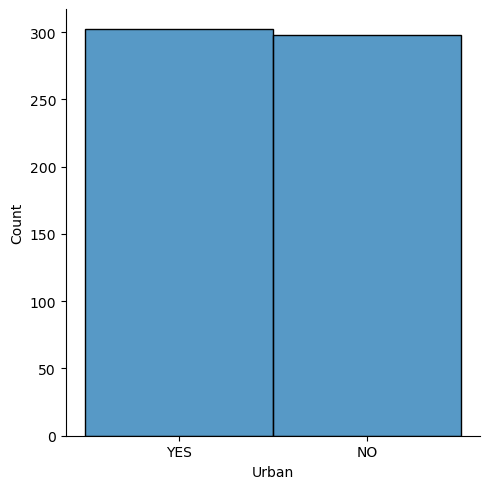

<Figure size 2000x700 with 0 Axes>

In [41]:
for n in df.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

Undergrad


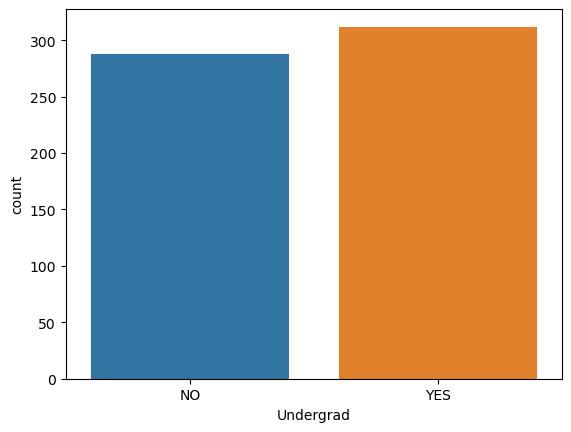

<Figure size 2000x700 with 0 Axes>

Marital.Status


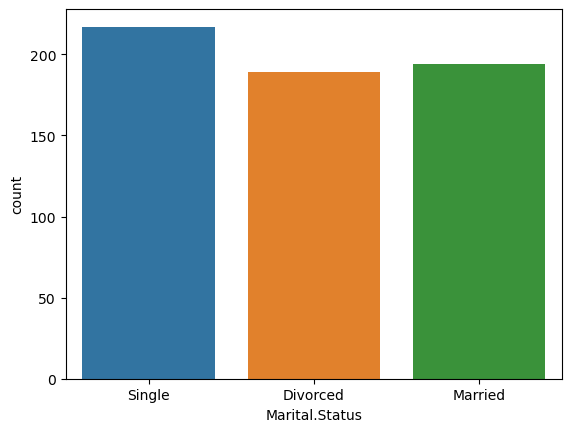

<Figure size 2000x700 with 0 Axes>

Taxable.Income


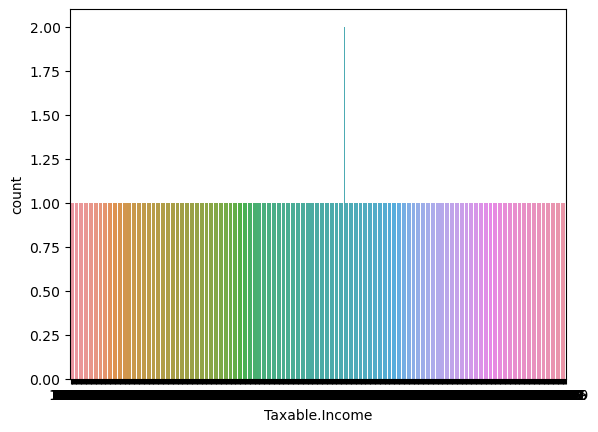

<Figure size 2000x700 with 0 Axes>

City.Population


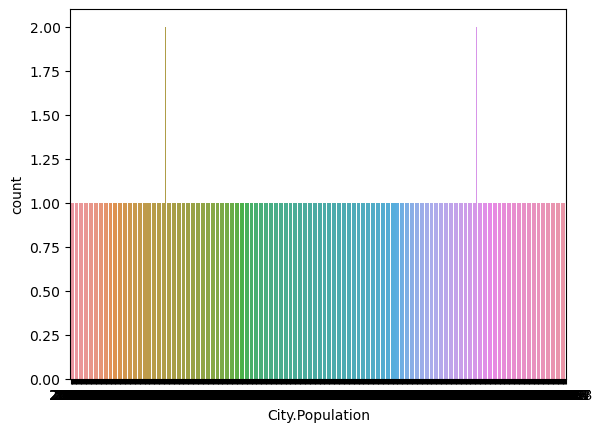

<Figure size 2000x700 with 0 Axes>

Work.Experience


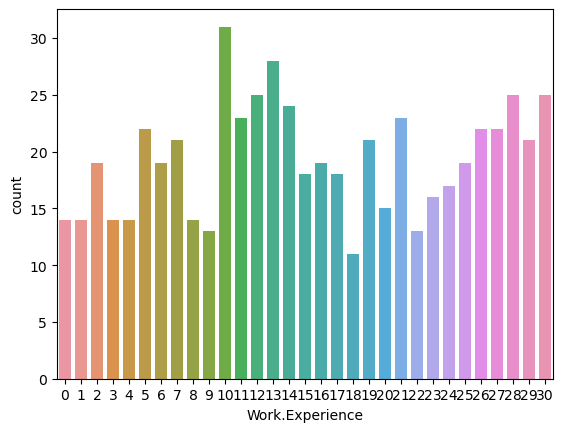

<Figure size 2000x700 with 0 Axes>

Urban


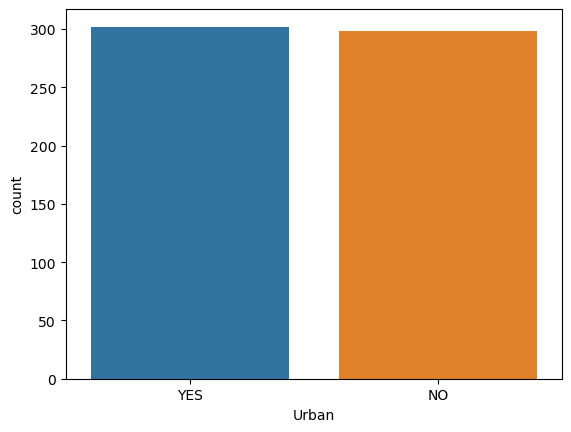

<Figure size 2000x700 with 0 Axes>

In [42]:
for n in df.columns:
    print(n)
    sns.countplot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

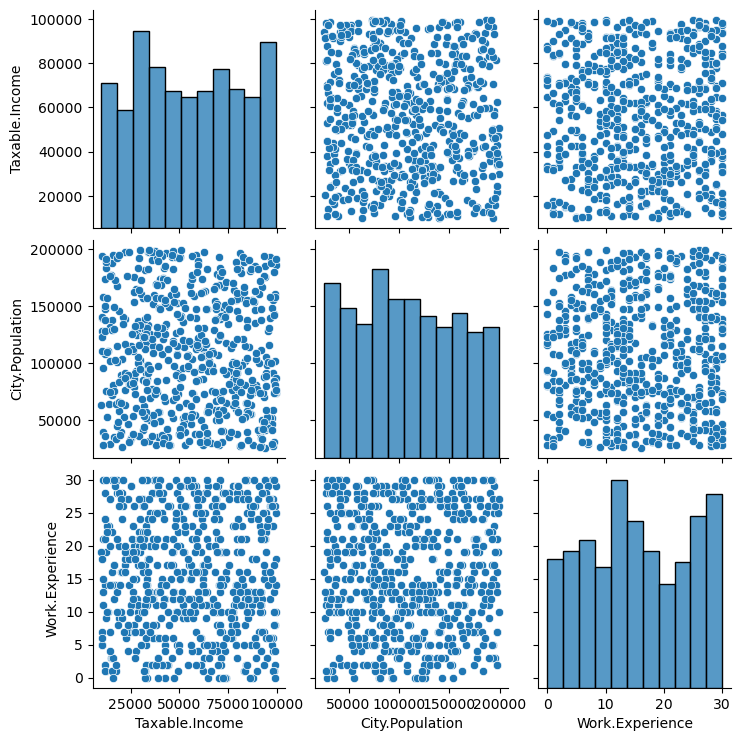

In [43]:
sns.pairplot(df)

In [44]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


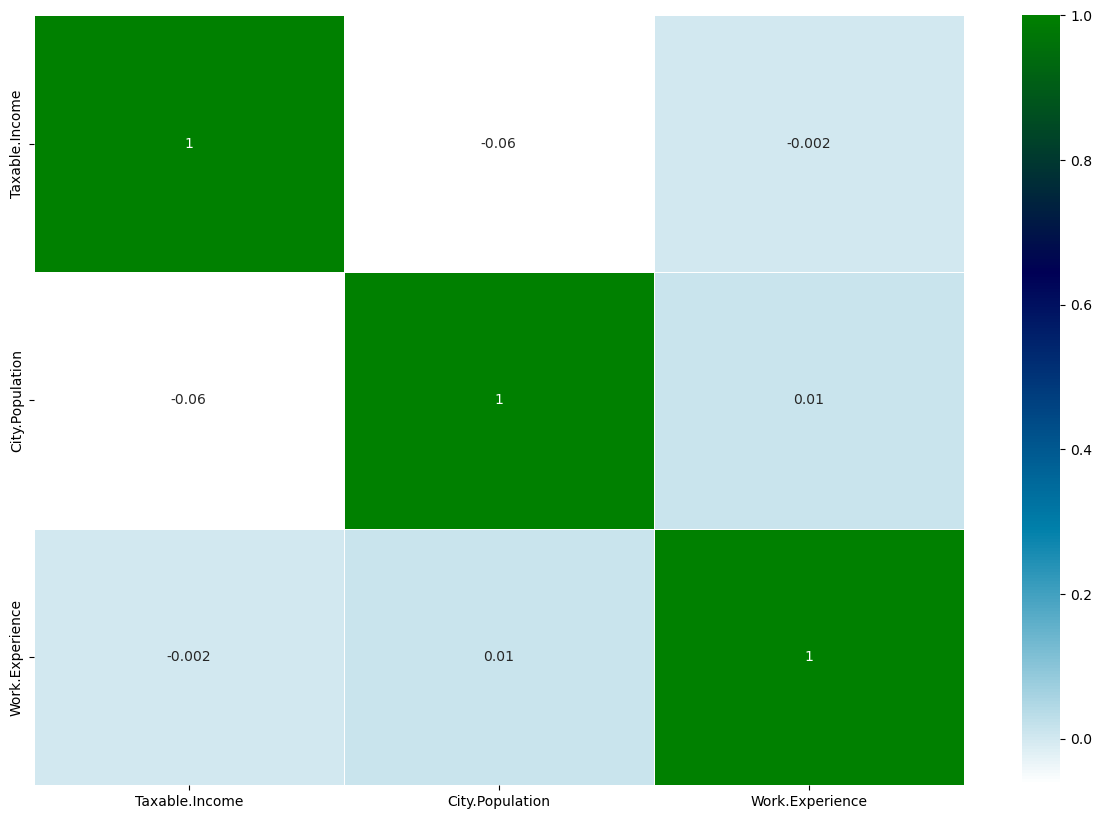

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap="ocean_r", annot=True, fmt='.1g',linewidth=0.5);

# Encoding

In [46]:
label_encoder=preprocessing.LabelEncoder()

In [47]:
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])

In [48]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [49]:
df['Urban']=label_encoder.fit_transform(df['Urban'])

In [50]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [51]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])

In [52]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [53]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [54]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,2,1,39492,7,1
596,1,2,1,55369,2,1
597,0,2,1,154058,0,1
598,1,1,1,180083,17,0


In [55]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [56]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])

In [57]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,2,39492,7,1
596,1,1,2,55369,2,1
597,1,0,2,154058,0,1
598,1,1,1,180083,17,0


In [58]:
df.corr()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Taxable.Income,1.000000,-0.012523,0.006081,-0.012225,0.001972,-0.004830
Undergrad,-0.012523,1.000000,-0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.006081,-0.042407,1.000000,0.001564,0.002213,-0.064562
City.Population,-0.012225,0.079579,0.001564,1.000000,0.013135,-0.040098
Work.Experience,0.001972,-0.005362,0.002213,0.013135,1.000000,-0.094559
Urban,-0.004830,-0.000267,-0.064562,-0.040098,-0.094559,1.000000


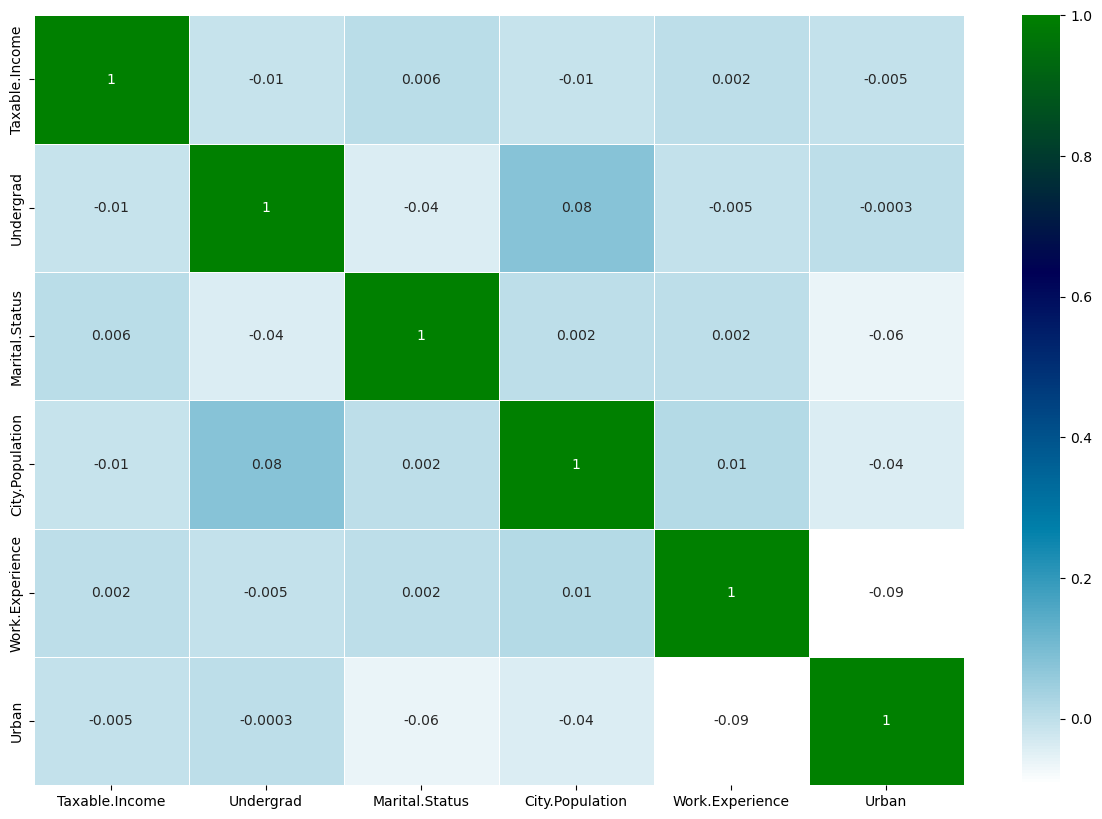

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="ocean_r",linewidth=0.5);

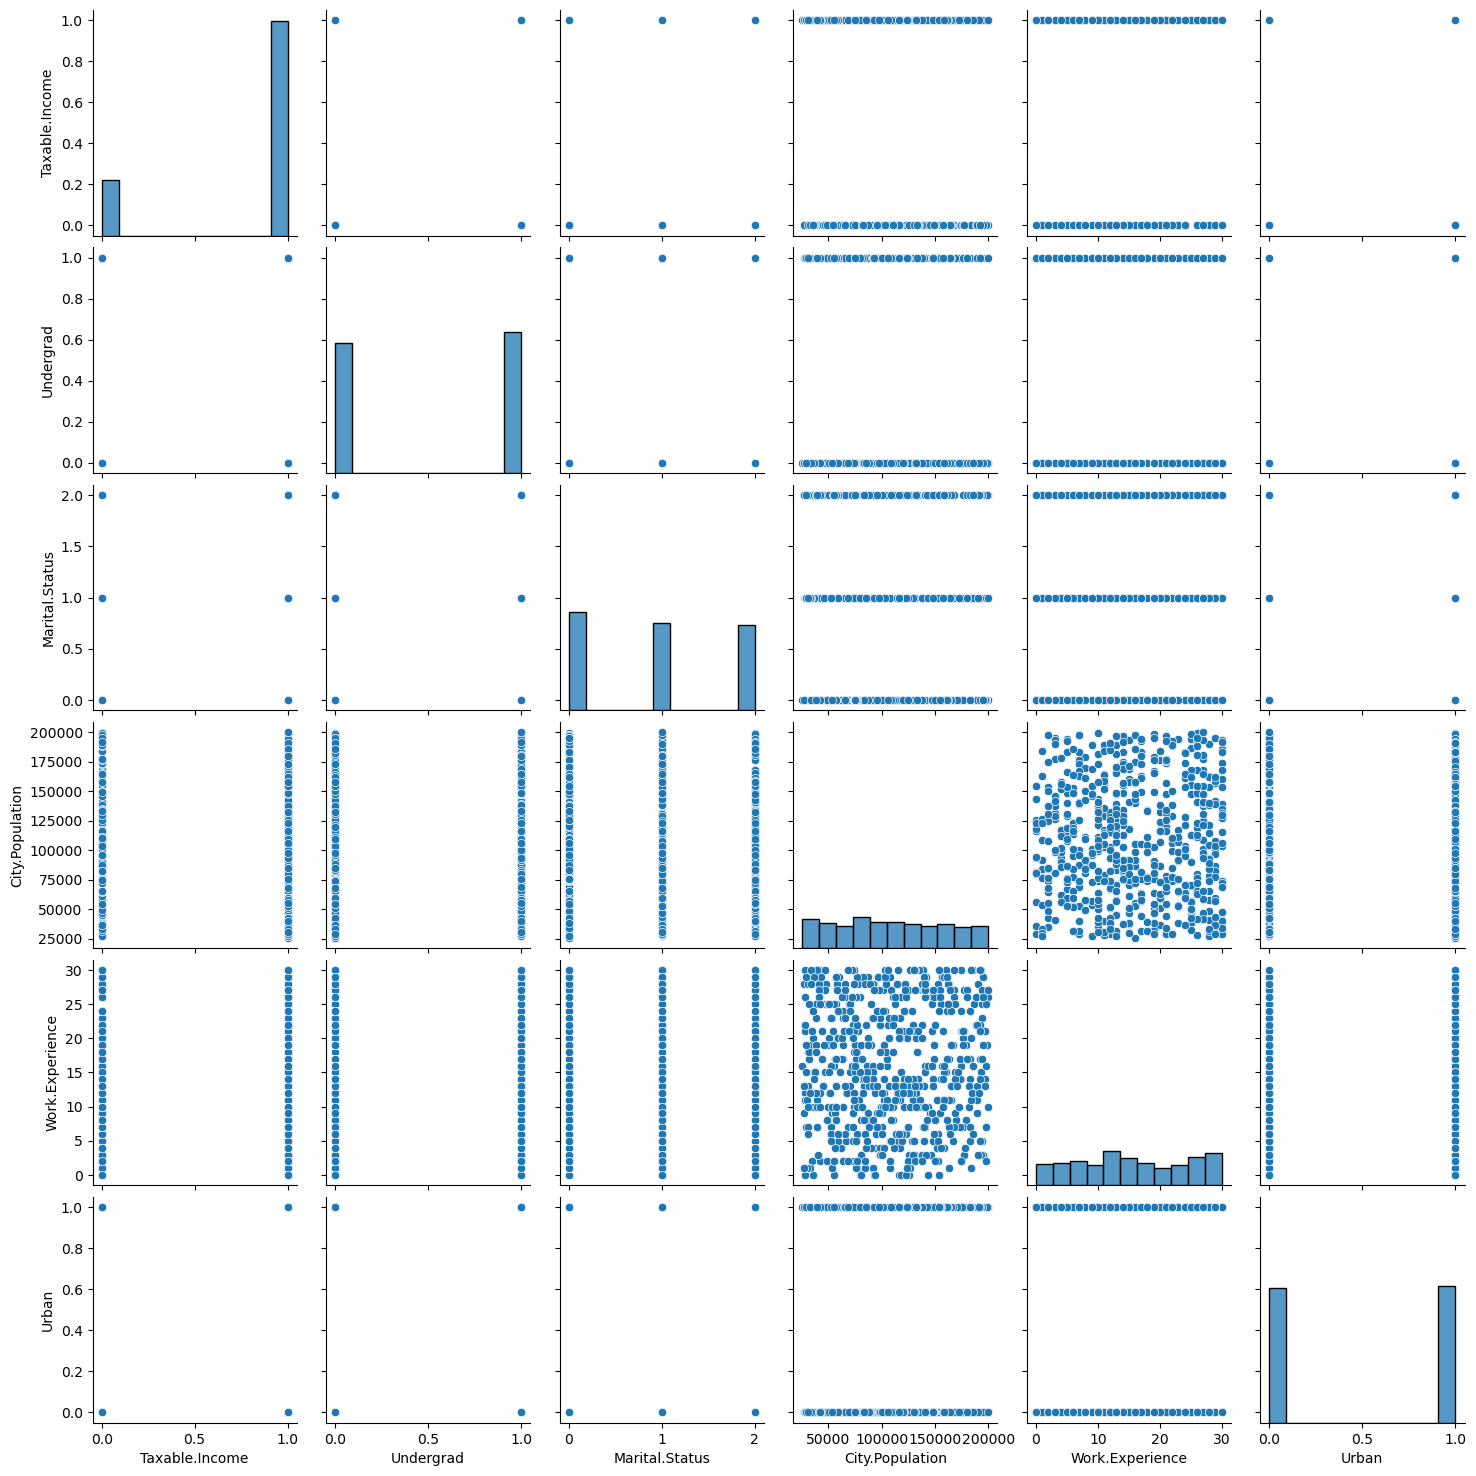

In [60]:
sns.pairplot(df)

# Train and Test

In [61]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [62]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [64]:
x.shape,y.shape

((600, 5), (600,))

In [65]:
y=pd.DataFrame(y)
y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [67]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}
model.fit(x_train,y_train)

DecisionTreeClassifier()

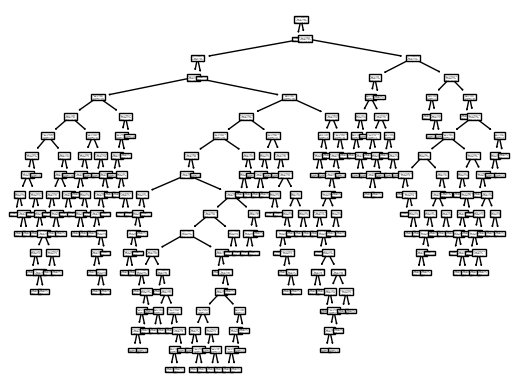

In [68]:
tree.plot_tree(model)
plt.show()

## SMOTETomek

In [73]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,2,39492,7,1
596,1,1,2,55369,2,1
597,1,0,2,154058,0,1
598,1,1,1,180083,17,0


In [74]:
sm = SMOTETomek(sampling_strategy='minority',random_state=42)
X_re,y_re = sm.fit_resample(df.drop(['Taxable.Income'],axis=1),df['Taxable.Income'])

In [75]:
df1 = pd.concat([pd.DataFrame(y_re),pd.DataFrame(X_re)],axis =1)

In [76]:
df1['Taxable.Income'].value_counts()

1    365
0    365
Name: Taxable.Income, dtype: int64

Text(0, 0.5, 'frequency')

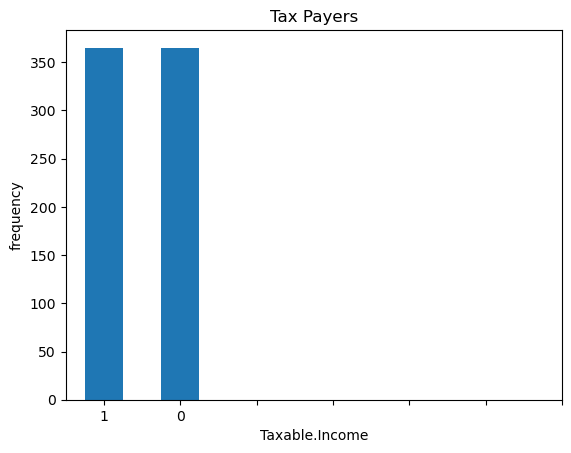

In [77]:
type_class = pd.value_counts(df1['Taxable.Income'],sort = True,ascending=True)
type_class.plot(kind ='bar',rot =0)
plt.title('Tax Payers')
plt.xticks(range(7))
plt.xlabel('Taxable.Income')
plt.ylabel('frequency')

In [78]:
array=df.values
x=array[:,1:]
y=array[:,0]

In [79]:
x

array([[     0,      0,  50047,     10,      1],
       [     1,      2, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      2, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      2, 158137,     16,      0]], dtype=int64)

In [80]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [82]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}
model.fit(x_train,y_train)

DecisionTreeClassifier()

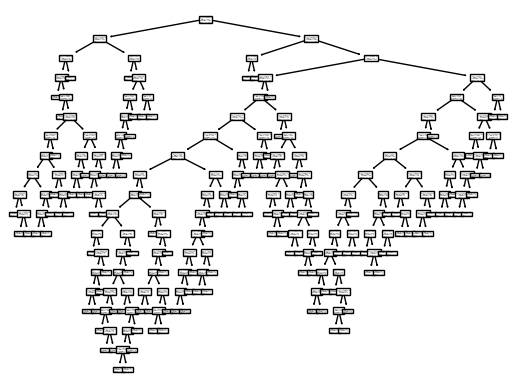

In [83]:
tree.plot_tree(model)
plt.show()

In [85]:
grid=GridSearchCV(model,parameters,cv=10)

In [86]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [87]:
grid.best_score_

0.7895833333333334

In [88]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 6}

In [89]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=6,random_state=14)

In [90]:
second_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       random_state=14)

In [91]:
y_test_pred=second_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [92]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.14      0.04      0.06        25
           1       0.79      0.94      0.86        95

    accuracy                           0.75       120
   macro avg       0.47      0.49      0.46       120
weighted avg       0.65      0.75      0.69       120



In [93]:
# Cross Validation
score=cross_val_score(second_model,x_train,y_train,cv=10)
score.mean()

0.7083333333333334

# Tree Based Models

## Random Forest

In [94]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,2,39492,7,1
596,1,1,2,55369,2,1
597,1,0,2,154058,0,1
598,1,1,1,180083,17,0


In [95]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [96]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [97]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [98]:
y.value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [100]:
model=RandomForestClassifier()
parameters={'n_estimators':[20,40,50,70,90,100],'criterion':['gini','entropy'],'max_features':[3,4,5]}

In [101]:
grid=GridSearchCV(model,parameters,cv=10)

In [102]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 4, 5],
                         'n_estimators': [20, 40, 50, 70, 90, 100]})

In [103]:
grid.best_score_

0.7645833333333334

In [104]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 3, 'n_estimators': 100}

### Final Model

In [105]:
final_model=RandomForestClassifier(criterion='gini',max_features=3, n_estimators=70)

In [106]:
final_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=70)

In [107]:
y_test_pred=final_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [108]:
ytp=pd.DataFrame(y_test_pred)
ytp

,0
0,1
1,1
2,1
3,1
4,1
...,...
115,1
116,1
117,1
118,1


In [109]:
ytp.value_counts()

1    114
0      6
dtype: int64

In [110]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.07      0.33      0.12         6
           1       0.96      0.78      0.86       114

    accuracy                           0.76       120
   macro avg       0.52      0.56      0.49       120
weighted avg       0.91      0.76      0.82       120



## AdaBoost

In [113]:
model=AdaBoostClassifier()
parameters={'n_estimators':[20,40,50,70,90,100],'criterion':['gini','entropy'],'max_features':[3,4,5]}

In [114]:
model.fit(x_train,y_train)

AdaBoostClassifier()

In [115]:
model.feature_importances_

array([0.02, 0.  , 0.76, 0.22, 0.  ])

In [116]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [117]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.78      0.87       120

    accuracy                           0.78       120
   macro avg       0.50      0.39      0.44       120
weighted avg       1.00      0.78      0.87       120



## Bagging

In [121]:
model=BaggingClassifier()
parameters={'n_estimators':[20,40,50,70,90,100],'criterion':['gini','entropy']}

In [122]:
model.fit(x_train,y_train)

BaggingClassifier()

In [123]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [124]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.15      0.27      0.19        15
           1       0.88      0.78      0.83       105

    accuracy                           0.72       120
   macro avg       0.51      0.52      0.51       120
weighted avg       0.79      0.72      0.75       120



## Gradient Boosting Classifier

In [125]:
model=GradientBoostingClassifier()
parameters={'n_estimators':[20,40,50,70,90,100],'criterion':['gini','entropy'],'max_features':[3,4,5]}

In [126]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [127]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.07      0.40      0.12         5
           1       0.97      0.78      0.87       115

    accuracy                           0.77       120
   macro avg       0.52      0.59      0.50       120
weighted avg       0.93      0.77      0.83       120

